In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

plt.style.use('ggplot')

In [2]:
nyc_crime = pd.read_csv('nyc_crime_clean_v1.csv')

In [3]:
nyc_crime = nyc_crime.drop('Unnamed: 0',axis=1)
nyc_crime.head()

,OFNS_DESC,BORO_NM,Lat_Lon,date,offense_category
0,DANGEROUS DRUGS,BRONX,"(40.866336332, -73.888359221)",2013-02-13,drug-alc
1,ASSAULT 3 & RELATED OFFENSES,QUEENS,"(40.758891257, -73.934656107)",2013-02-13,agg assault
2,GRAND LARCENY,BROOKLYN,"(40.727623753, -73.952979064)",2013-02-13,larceny
3,CRIMINAL TRESPASS,BROOKLYN,"(40.67511643, -73.904375958)",2013-02-13,other
4,POSSESSION OF STOLEN PROPERTY,MANHATTAN,"(40.738145333, -73.99004194)",2013-02-13,other


In [4]:
nyc_crime['date'] = pd.to_datetime(nyc_crime['date'])

In [5]:
nyc_crime['month_year'] = nyc_crime['date'].dt.to_period('M')

In [6]:
type(nyc_crime['month_year'][0])

pandas._libs.tslibs.period.Period

In [7]:
# convert period back to timestamp
nyc_crime['month_year'] = nyc_crime['month_year'].astype(str)
nyc_crime['month_year'] = pd.to_datetime(nyc_crime['month_year'], format='%Y-%m')


In [8]:
type(nyc_crime['month_year'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
nyc_crime.head()

,OFNS_DESC,BORO_NM,Lat_Lon,date,offense_category,month_year
0,DANGEROUS DRUGS,BRONX,"(40.866336332, -73.888359221)",2013-02-13,drug-alc,2013-02-01
1,ASSAULT 3 & RELATED OFFENSES,QUEENS,"(40.758891257, -73.934656107)",2013-02-13,agg assault,2013-02-01
2,GRAND LARCENY,BROOKLYN,"(40.727623753, -73.952979064)",2013-02-13,larceny,2013-02-01
3,CRIMINAL TRESPASS,BROOKLYN,"(40.67511643, -73.904375958)",2013-02-13,other,2013-02-01
4,POSSESSION OF STOLEN PROPERTY,MANHATTAN,"(40.738145333, -73.99004194)",2013-02-13,other,2013-02-01


In [10]:
a = nyc_crime['month_year'].unique()
a.sort()
a

array(['2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-10-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01

In [11]:
nyc_crime.describe()

,OFNS_DESC,BORO_NM,Lat_Lon,date,offense_category,month_year
count,5244873,5244873,5244873,5244873,5244873,5244873
unique,58,5,114016,4519,14,156
top,PETIT LARCENY,BROOKLYN,"(40.750430768, -73.989282176)",2006-11-01 00:00:00,larceny,2007-10-01 00:00:00
freq,982992,1564185,19208,1618,1514486,42360
first,NaN,NaN,NaN,2006-01-01 00:00:00,NaN,2006-01-01 00:00:00
last,NaN,NaN,NaN,2018-12-25 00:00:00,NaN,2018-12-01 00:00:00


In [12]:
nyc_crime['year'] = nyc_crime['month_year'].dt.year

In [13]:
x = nyc_crime['month_year'].unique()
x.sort()
x

array(['2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-10-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01

In [14]:
nyc_crime = nyc_crime[nyc_crime['month_year'] >= '2010-01-01']

In [54]:
nyc_crime = nyc_crime[nyc_crime['month_year'] < '2018-01-01']

In [55]:
nyc_pub_disorder = nyc_crime.loc[nyc_crime['offense_category'] == 'pub disorder']
nyc_drug_alc = nyc_crime.loc[nyc_crime['offense_category'] == 'drug-alc']
nyc_white_collar = nyc_crime.loc[nyc_crime['offense_category'] == 'white collar']
nyc_auto_theft = nyc_crime.loc[nyc_crime['offense_category'] == 'auto-theft']
nyc_larceny = nyc_crime.loc[nyc_crime['offense_category'] == 'larceny']
nyc_other_crimes_agnst_per = nyc_crime.loc[nyc_crime['offense_category'] == 'other crimes against persons']
nyc_burglary = nyc_crime.loc[nyc_crime['offense_category'] == 'burglary']
nyc_other = nyc_crime.loc[nyc_crime['offense_category'] == 'other']
nyc_agg_assault = nyc_crime.loc[nyc_crime['offense_category'] == 'agg assault']
nyc_robbery = nyc_crime.loc[nyc_crime['offense_category'] == 'robbery']
nyc_sex_asslt = nyc_crime.loc[nyc_crime['offense_category'] == 'sexual assault']
nyc_arson = nyc_crime.loc[nyc_crime['offense_category'] == 'arson']
nyc_child = nyc_crime.loc[nyc_crime['offense_category'] == 'child']
nyc_murder = nyc_crime.loc[nyc_crime['offense_category'] == 'murder']

# Primary Categories

Murder, Drug-Alc, Larceny, Burglary, Robbery

We're comparing this data to that of Seattle.  We're going to need the per capita change of each of these crime rates.

2011 population = 8.293 mil

2012 population = 8.384 mil  

2013 population = 8.459 mil

-----------------------------

2011 drug-alc/capita = 44579/8.293 mil = 5.48* 10^-3

2012 drug-alc/capita = 41493/8.382 mil = 4.95 * 10^-3

2013 drug-alc/capita = 37743/8.459 mil = 4.46 * 10^-3

----------------------------------

2011 larceny/capita = 121112/8.293 mil = 1.46 * 10^-2

2012 larceny/capita = 127358/8.382 mil = 1.52 * 10^-2

2013 larceny/capita = 132821/8.459 mil = 1.57 * 10^-2

------------------------------------

2011 robbery/capita = 19764/8.293 mil = 2.38 * 10^-3

2012 robbery/capita = 20191/8.382 mil = 2.41 * 10^-3

2013 robbery/capita = 19171/8.459 mil = 2.27 * 10^-3

-------------------------------------

2011 burglary/capita = 19104/8.293 mil = 2.30 * 10^-3

2012 burglary/capita = 19552/8.382 mil = 2.33 * 10^-3

2013 burglary/capita = 17799/8.459 mil = 2.12 * 10^-3

-----------------------------------

2011 murder/capita = 15/8.293 mil = 1.81 * 10^-6

2012 murder/capita = 27/8.382 mil = 3.22 * 10^-6

2013 murder/capita = 29/8.459 mil = 3.43 * 10^-6


In [16]:
x_drug_alc = nyc_drug_alc['month_year'].unique()
x_drug_alc.sort()


/Users/ajfong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


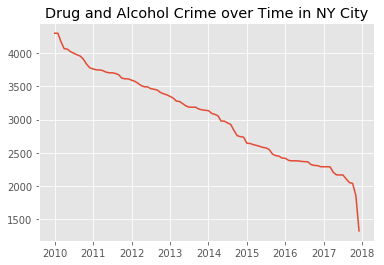

In [17]:
plt.title('Drug and Alcohol Crime over Time in NY City')
plt.plot(x_drug_alc,nyc_drug_alc['month_year'].value_counts())

In [85]:
drug_alc_by_year = nyc_drug_alc['year'].value_counts()

In [87]:
drug_alc_by_year = drug_alc_by_year.sort_index()

In [88]:
yearly_drug_alc = pd.DataFrame(years,columns=['year'])
yearly_drug_alc['population'] = populations
yearly_drug_alc['count'] = drug_alc_by_year.values
yearly_drug_alc['rate'] = yearly_drug_alc['count']/yearly_drug_alc['population']
yearly_drug_alc

,year,population,count,rate
0,2010,8194000,45508,0.005554
1,2011,8293000,44579,0.005375
2,2012,8384000,41493,0.004949
3,2013,8459000,37743,0.004462
4,2014,8521000,36756,0.004314
5,2015,8582000,29701,0.003461
6,2016,8615000,28711,0.003333
7,2017,8623000,27671,0.003209


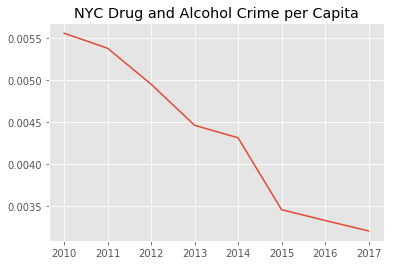

In [89]:
plt.title('NYC Drug and Alcohol Crime per Capita')
plt.plot(yearly_drug_alc['year'],yearly_drug_alc['rate'])

In [76]:
x_larceny = nyc_larceny['month_year'].unique()
x_larceny.sort()


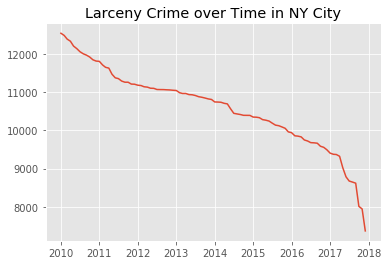

In [77]:
plt.title('Larceny Crime over Time in NY City')

plt.plot(x_larceny,nyc_larceny['month_year'].value_counts())

In [78]:
larceny_by_year = nyc_larceny['year'].value_counts()

In [79]:
larceny_by_year = larceny_by_year.sort_index()

In [82]:
yearly_larceny = pd.DataFrame(years, columns=['year'])
yearly_larceny['population'] = populations
yearly_larceny['count'] = larceny_by_year.values

In [83]:
yearly_larceny['larceny rate'] = yearly_larceny['count']/yearly_larceny['population']
yearly_larceny

,year,population,count,larceny rate
0,2010,8194000,120285,0.014680
1,2011,8293000,121112,0.014604
2,2012,8384000,127358,0.015191
3,2013,8459000,132821,0.015702
4,2014,8521000,130973,0.015371
5,2015,8582000,127748,0.014886
6,2016,8615000,127901,0.014846
7,2017,8623000,128731,0.014929


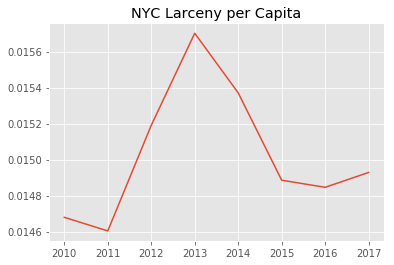

In [84]:
plt.title('NYC Larceny per Capita')
plt.plot(yearly_larceny['year'],yearly_larceny['larceny rate'])

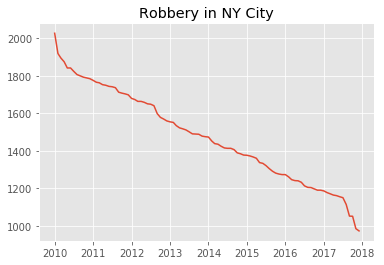

In [24]:
x_robbery = nyc_robbery['month_year'].unique()
x_robbery.sort()
plt.title('Robbery in NY City')
plt.plot(x_robbery, nyc_robbery['month_year'].value_counts())

In [62]:
robbery_by_year = nyc_robbery['year'].value_counts()

In [64]:
robbery_by_year = robbery_by_year.sort_index()

In [67]:
robbery_by_year

2010    19475
2011    19764
2012    20191
2013    19171
2014    16568
2015    16970
2016    15529
2017    13991
Name: year, dtype: int64

In [66]:
yearly_robbery = pd.DataFrame(years,columns =['year'])
yearly_robbery

,year
0,2010
1,2011
2,2012
3,2013
4,2014
5,2015
6,2016
7,2017


In [70]:
yearly_robbery['population'] = populations
yearly_robbery['count'] = robbery_by_year.values
yearly_robbery['robbery rate'] = yearly_robbery['count']/yearly_robbery['population']
yearly_robbery

,year,population,count,robbery rate
0,2010,8194000,19475,0.002377
1,2011,8293000,19764,0.002383
2,2012,8384000,20191,0.002408
3,2013,8459000,19171,0.002266
4,2014,8521000,16568,0.001944
5,2015,8582000,16970,0.001977
6,2016,8615000,15529,0.001803
7,2017,8623000,13991,0.001623


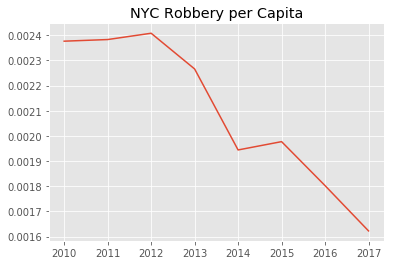

In [72]:
plt.title('NYC Robbery per Capita')
plt.plot(yearly_robbery['year'], yearly_robbery['robbery rate'])

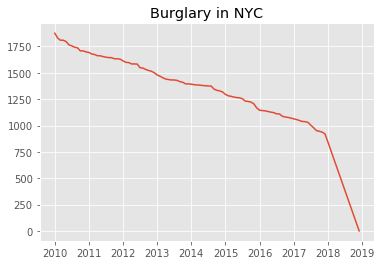

In [26]:
x_burglary = nyc_burglary['month_year'].unique()
x_burglary.sort()
plt.title('Burglary in NYC')
plt.plot(x_burglary, nyc_burglary['month_year'].value_counts())

In [56]:
nyc_burglary['year'].value_counts()

2012    19552
2011    19104
2010    18838
2013    17799
2014    17222
2015    15468
2016    13304
2017    12397
Name: year, dtype: int64

In [57]:
burglary_by_year = nyc_burglary['year'].value_counts()

In [58]:
burglary_by_year = burglary_by_year.sort_index()

In [59]:
yearly_burglary = pd.DataFrame(years,columns =['year'])
yearly_burglary

,year
0,2010
1,2011
2,2012
3,2013
4,2014
5,2015
6,2016
7,2017


In [60]:
yearly_burglary['population'] = populations
yearly_burglary['count'] = burglary_by_year.values
yearly_burglary['burglary rate'] = yearly_burglary['count']/yearly_burglary['population']
yearly_burglary

,year,population,count,burglary rate
0,2010,8194000,18838,0.002299
1,2011,8293000,19104,0.002304
2,2012,8384000,19552,0.002332
3,2013,8459000,17799,0.002104
4,2014,8521000,17222,0.002021
5,2015,8582000,15468,0.001802
6,2016,8615000,13304,0.001544
7,2017,8623000,12397,0.001438


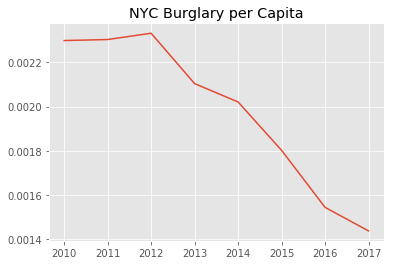

In [61]:
plt.title('NYC Burglary per Capita')
plt.plot(yearly_burglary['year'],yearly_burglary['burglary rate'])

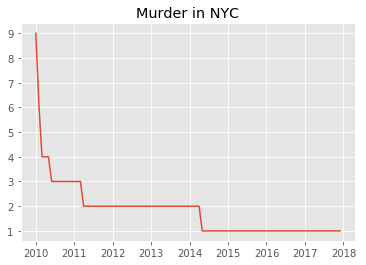

In [28]:
x_murder = nyc_murder['month_year'].unique()
x_murder.sort()

plt.title('Murder in NYC')
plt.plot(x_murder, nyc_murder['month_year'].value_counts())

In [29]:
murders_by_year = nyc_murder['year'].value_counts()

In [30]:
murders_by_year = murders_by_year.sort_index()

In [44]:
murders_by_year

2010    18
2011    15
2012    27
2013    29
2014    22
2015    12
2016     9
2017    20
Name: year, dtype: int64

In [32]:
years = [2010,2011,2012,2013,2014,2015,2016,2017]

In [33]:
populations = [8194000,8293000,8384000,8459000,8521000,8582000,8615000,8623000]

In [34]:
yearly_murder = pd.DataFrame(years, columns =['year'])

In [35]:
yearly_murder['population'] = populations

In [47]:
yearly_murder['# murders'] = murders_by_year.values

In [49]:
yearly_murder['murder rate'] = yearly_murder['# murders']/yearly_murder['population']
yearly_murder

,year,population,# murders,murder rate
0,2010,8194000,18,0.000002
1,2011,8293000,15,0.000002
2,2012,8384000,27,0.000003
3,2013,8459000,29,0.000003
4,2014,8521000,22,0.000003
5,2015,8582000,12,0.000001
6,2016,8615000,9,0.000001
7,2017,8623000,20,0.000002


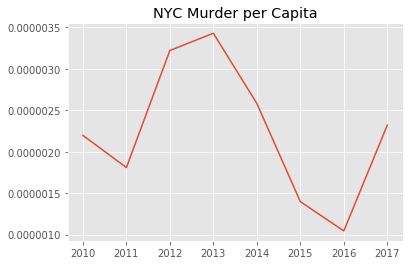

In [50]:
plt.title('NYC Murder per Capita')
plt.plot(yearly_murder['year'],yearly_murder['murder rate'])


# Other Categories

In [ ]:
plt.title('')

In [84]:
x_pub_disorder = nyc_pub_disorder['month_year'].unique()
x_pub_disorder.sort()


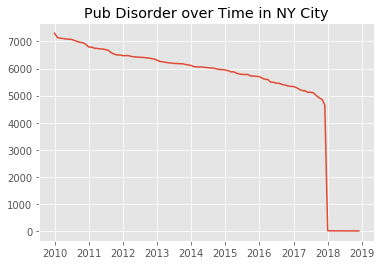

In [85]:
plt.title('Pub Disorder over Time in NY City')
plt.plot(x_pub_disorder,nyc_pub_disorder['month_year'].value_counts())